## Measuring occupational mobility
### Trying to reproduce Bottom Left panel form Figure B.1. Full sample retrospective (non imputed values) from vom Lehm et al. 2022. 

From original paper we see
''We focus on the privately employed adult civilian population in the United States,
dropping individuals under the age of 18 and individuals working in government industries or private households.
We also drop all observations where occupation is imputed (including entirely imputed responses in theMarch CPS)''
In this notebook we filger by age and employment status (AGE, EMPSTAT).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt
pd.options.mode.chained_assignment = None 
path_data = "../data/"
file_asec = "cps_asec.csv"

In [2]:
# Read ipums data
df_asec = pd.read_csv(path_data + file_asec)
# filter by those with ASECFLAG
df_asec = df_asec[df_asec["ASECFLAG"] == 1]
# only consider people 18 or above
df_asec = df_asec[df_asec["AGE"] >=18]
# only consider those employed
employed_codes = [10, 12]
df_asec = df_asec[df_asec["EMPSTAT"].isin(employed_codes)]

In [3]:
def occ_mobility(year, codes='50'):
    # focusing on year 2018 with 1950 codes
    df_asec_year = df_asec[df_asec["YEAR"] == year]
    # Make a column documenting changes in occupations
    df_asec_year["ChangeOcc"] = np.where(df_asec_year['OCC19'+codes]!=df_asec_year['OCC'+codes+'LY'], True, False)
    # Multiply each change in occupation by asec weight
    df_asec_year["ChangeOccWT"] = df_asec_year["ChangeOcc"] * df_asec_year["ASECWT"]
    # calculate percentage of worker that switched

    print("Occupational mobility rate ", year, " using 19"+codes+" occ codes", \
          np.round(df_asec_year["ChangeOccWT"].sum()/df_asec_year["ASECWT"].sum(), 3))
    return df_asec_year["ChangeOccWT"].sum()/df_asec_year["ASECWT"].sum()

Occupational mobility rate  2011  using 1950 occ codes 0.095
Occupational mobility rate  2012  using 1950 occ codes 0.097
Occupational mobility rate  2013  using 1950 occ codes 0.098
Occupational mobility rate  2014  using 1950 occ codes 0.109
Occupational mobility rate  2015  using 1950 occ codes 0.111
Occupational mobility rate  2016  using 1950 occ codes 0.113
Occupational mobility rate  2017  using 1950 occ codes 0.112
Occupational mobility rate  2018  using 1950 occ codes 0.126


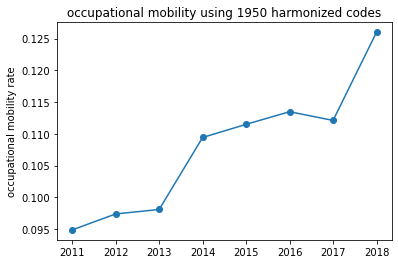

In [4]:
# Print and plot results
mobility_50codes = []
for y in range(2011, 2019):
    mobility_50codes.append(occ_mobility(y, codes='50'))
    
plt.plot([y for y in range(2011, 2019)], mobility_50codes, "o-")
plt.ylabel("occupational mobility rate")
plt.title("occupational mobility using 1950 harmonized codes")
plt.show()

Occupational mobility rate  2011  using 1990 occ codes 0.106
Occupational mobility rate  2012  using 1990 occ codes 0.108
Occupational mobility rate  2013  using 1990 occ codes 0.11
Occupational mobility rate  2014  using 1990 occ codes 0.124
Occupational mobility rate  2015  using 1990 occ codes 0.126
Occupational mobility rate  2016  using 1990 occ codes 0.13
Occupational mobility rate  2017  using 1990 occ codes 0.127
Occupational mobility rate  2018  using 1990 occ codes 0.142


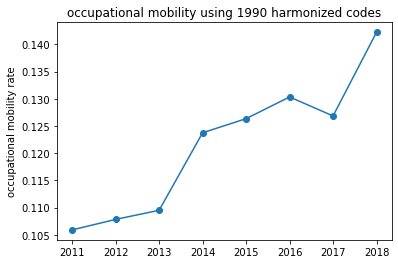

In [6]:
mobility_90codes = []
for y in range(2011, 2019):
    mobility_90codes.append(occ_mobility(y, codes='90'))
    
plt.plot([y for y in range(2011, 2019)], mobility_90codes, "o-")
plt.ylabel("occupational mobility rate")
plt.title("occupational mobility using 1990 harmonized codes")
plt.show()

In [9]:
def occ_mobility(year):
    # focusing on year 2018 with 1950 codes
    df_asec_year = df_asec[df_asec["YEAR"] == year]
    # Make a column documenting changes in occupations
    df_asec_year["ChangeOcc"] = np.where(df_asec_year['OCC']!=df_asec_year['OCC'+'LY'], True, False)
    # Multiply each change in occupation by asec weight
    df_asec_year["ChangeOccWT"] = df_asec_year["ChangeOcc"] * df_asec_year["ASECWT"]
    # calculate percentage of worker that switched

    print("Occupational mobility rate ", year, \
          np.round(df_asec_year["ChangeOccWT"].sum()/df_asec_year["ASECWT"].sum(), 3))
    return df_asec_year["ChangeOccWT"].sum()/df_asec_year["ASECWT"].sum()

Occupational mobility rate  2011 0.11
Occupational mobility rate  2012 0.113
Occupational mobility rate  2013 0.115
Occupational mobility rate  2014 0.131
Occupational mobility rate  2015 0.133
Occupational mobility rate  2016 0.138
Occupational mobility rate  2017 0.133
Occupational mobility rate  2018 0.15


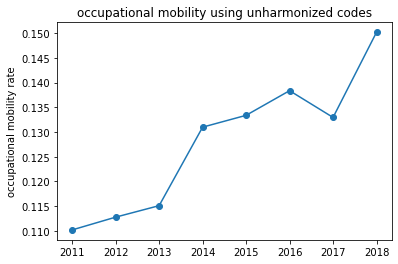

In [11]:
# Print and plot results
mobility_50codes = []
for y in range(2011, 2019):
    mobility_50codes.append(occ_mobility(y))
    
plt.plot([y for y in range(2011, 2019)], mobility_50codes, "o-")
plt.ylabel("occupational mobility rate")
plt.title("occupational mobility using unharmonized codes")
plt.show()